In [7]:
import sklearn
import pandas
import matplotlib
import seaborn

In [8]:
# Actual Value
labels = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
# Predicted Value
predictions = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

### True Positive

In [9]:
TP = 0

for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 1:
        TP+=1
print("True Positive: ", TP)

True Positive:  3


### False Positive

In [10]:
FP = 0

for i in range(0,len(labels)):
    if labels[i] == 0 and predictions[i] == 1:
        FP+=1
print("False Positive: ", FP)

False Positive:  3


### True Negative

In [11]:
TN = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 0:
        TN+=1
print("True Negative: ", TN)

True Negative:  0


### False Negative

In [12]:
FN = 0
for i in range(0,len(labels)):
    if labels[i] == 1 and predictions[i] == 0:
        FN+=1
print("False Negative: ", FN)

False Negative:  4


### Correct Prediction


In [13]:
CP = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i]:
        CP+=1
print("Correct Prediction: ", CP)
print(CP == TP + TN)

Correct Prediction:  3
True


### Incorrect Prediction

In [14]:
ICP = 0
for i in range(0,len(labels)):
    if labels[i] != predictions[i]:
        ICP+=1
print("Incorrect Prediction: ", ICP)
print(ICP == FP + FN)

Incorrect Prediction:  7
True


### Accuracy

In [15]:
accuracy = (TP + TN)/(TP + FP + TN + FN)
print(accuracy*100)

30.0


In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels , predictions)*100)

30.0


### Recall

In [17]:
labels = [0,0,0,0,1,0,0,1,0,0]
predictions = [0 ,0 ,0 ,0 ,0 , 0 ,0 ,0 ,0 ,0]
print(accuracy_score(labels , predictions)*100)

80.0


In [18]:
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 1:
        TP+=1
for i in range(0,len(labels)):
    if labels[i] == 1 and predictions[i] == 0:
        FN+=1
recall = (TP)/(TP+FN)
print(recall)

0.3333333333333333


In [19]:
from sklearn.metrics import recall_score
print(recall_score(labels,predictions))

0.0


### Precision

In [20]:
labels = [0,0,0,0,1,0,0,1,0,0]
predictions = [1,1,1,1,1,1,1,1,1,1]
print(accuracy_score(labels , predictions)*100)
print(recall_score(labels , predictions)*100)

20.0
100.0


In [21]:
TP,FP = 0,0 
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 1:
        TP+=1
for i in range(0,len(labels)):
    if labels[i] == 0 and predictions[i] == 1:
        FP+=1
precision = TP/(TP+FP)
print(precision)
recall = recall_score(labels, predictions)


0.2


In [22]:
from sklearn.metrics import precision_score
print(precision_score(labels,predictions)*100)

20.0


### F1 Score

In [23]:
AM = (1 + 0.2)/2
HM = 2*(1*0.2)/(1+0.2)
print(AM)
print(HM)

0.6
0.33333333333333337


In [24]:

f1 = 2*(precision * recall)/(precision + recall)
print(f1)
from sklearn.metrics import f1_score
print(f1_score(labels, predictions))

0.33333333333333337
0.33333333333333337


### Confusion Matrix

In [25]:
# Actual Value
labels = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
# Predicted Value
predictions = [0, 0, 1, 1, 1, 0, 1, 0, 1, 0]
print(sum([1 for e in labels if e ==1 ]))
print(sum([1 for e in labels if e ==0 ]))

print(sum([1 for e in predictions if e ==1 ]))
print(sum([1 for e in predictions if e ==0 ]))

7
3
5
5


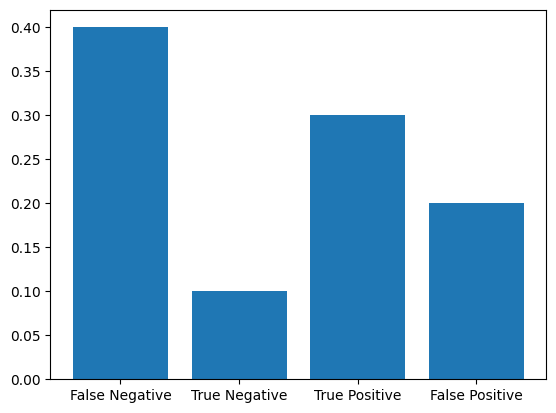

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(labels, predictions , normalize= 'all')
FN = confusion[1][0]
TN = confusion[0][0]
TP = confusion[1][1]
FP = confusion[0][1]
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[FN,TN,TP,FP])
plt.show()

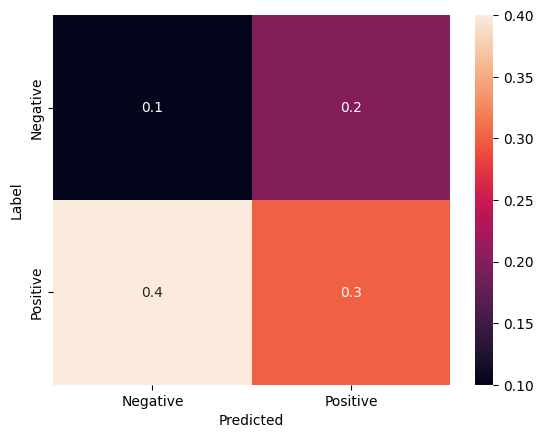

In [27]:
import seaborn as sns
sns.heatmap(confusion , annot=True , xticklabels=['Negative' , 'Positive'] , yticklabels=['Negative' , 'Positive'])
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()

In [28]:
import pandas as pd

data = {'Labels' : labels, 'Predictions': predictions}
df = pd.DataFrame(data, columns=['Labels','Predictions'])
confusion_matrix = pd.crosstab(df['Labels'], df['Predictions'], rownames=['Labels'], colnames=['Predictions'])
print (confusion_matrix)

Predictions  0  1
Labels           
0            1  2
1            4  3


In [29]:
from sklearn.metrics import classification_report
print(classification_report(labels,predictions))

              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.60      0.43      0.50         7

    accuracy                           0.40        10
   macro avg       0.40      0.38      0.38        10
weighted avg       0.48      0.40      0.42        10

